In [1]:
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt
import numpy

sns.set_context('notebook')
sns.set_style('whitegrid')
%matplotlib notebook

In [2]:
conf = config.Config()

In [3]:
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
ch = slowcon.channel_id_by_name['uB_Cryo_IFIX_1_0/LT122_Ar']

In [4]:
now = datetime.datetime(year=2017, month=7, day=19, hour=23)
one_week_ago = datetime.datetime(year=2017, month=7, day=12)

In [5]:
form = lambda x : x.strftime("%Y-%m-%d %H:%M:%S")

In [6]:
slowcon.query_timebinned_data(ch,1, form(one_week_ago), form(now))
result = slowcon.cur.fetchall()

In [7]:
x = [datetime.datetime.fromtimestamp(i[1]) for i in result]
y = [i[2] for i in result]

<IPython.core.display.Javascript object>


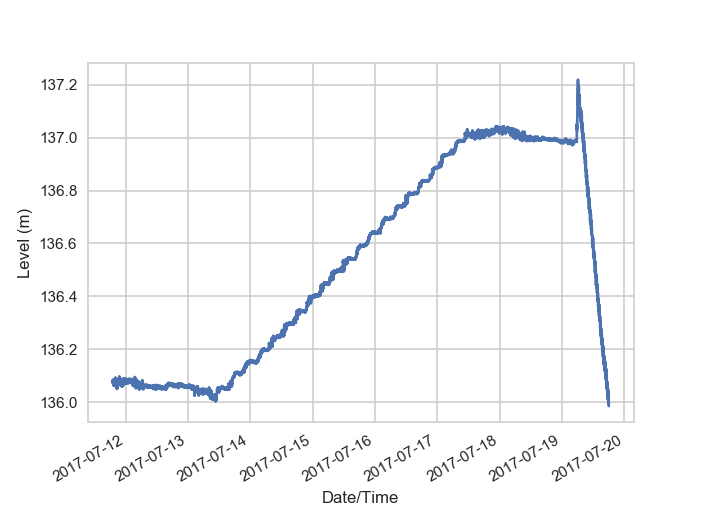

In [8]:
ax = plt.figure()
plt.plot(x,y)
plt.xlabel('Date/Time')
plt.ylabel('Level (m)')
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


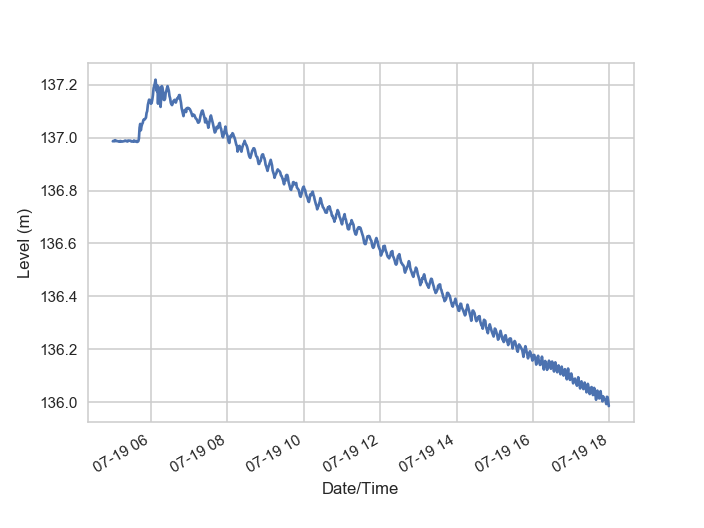

In [9]:
one_week_ago = now - datetime.timedelta(hours=13)
slowcon.query_timebinned_data(ch,1, form(one_week_ago), form(now))
result = slowcon.cur.fetchall()
x = [datetime.datetime.fromtimestamp(i[1]) for i in result]
y = [i[2] for i in result]
ax = plt.figure()
plt.plot(x,y)
plt.xlabel('Date/Time')
plt.ylabel('Level (m)')
ax.autofmt_xdate()

In [10]:
import scipy 
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress([int(i.strftime('%s')) for i in x],y)
print slope, intercept, r_value, p_value, std_err

-2.61930688804e-05 39438.8438606 -0.984610025653 0.0 1.70448114759e-07


<IPython.core.display.Javascript object>


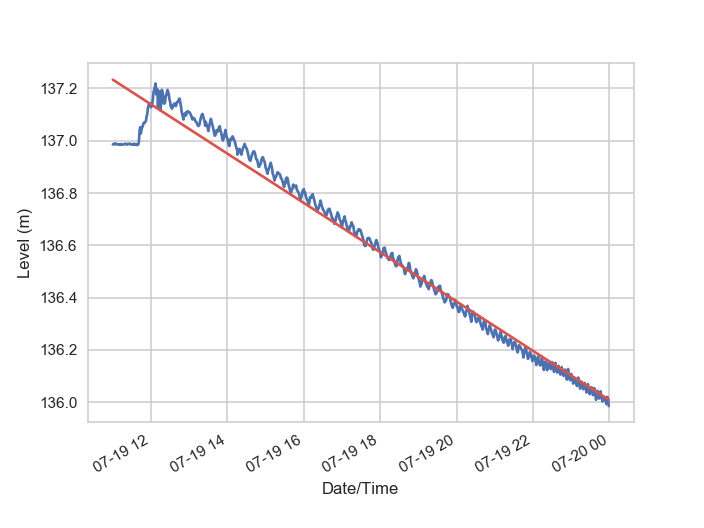

In [11]:
ax = plt.figure()
plt.plot([i + datetime.timedelta(hours=6) for i in x],y)
int_y = [intercept+slope*int(i.strftime('%s')) for i in x]
plt.plot([i + datetime.timedelta(hours=6) for i in x], int_y, color=sns.xkcd_rgb["pale red"])
plt.xlabel('Date/Time')
plt.ylabel('Level (m)')
ax.autofmt_xdate()

In [12]:
end_time = (3.38-intercept)/slope
print "We will run into trouble at: ", datetime.datetime.fromtimestamp(end_time)

We will run into trouble at:  2017-09-16 08:31:09.354974


In [13]:
print datetime.datetime(year=2017, month=7, day=20, hour=10, minute=30)
end_level = intercept + slope*int(datetime.datetime(year=2017, month=7, day=20, hour=10, minute=30).strftime('%s'))
print "We will start ramping down at: ", end_level

2017-07-20 10:30:00
We will start ramping down at:  134.451933297
